# DataJoint U24 - Workflow DeepLabCut

## Introduction

This notebook introduces some useful DataJoint for exploring pipelines featuring the DeepLabCut Element.

+ DataJoint needs to be configured before running this notebook (see [01-Configure](./01-Configure.ipynb)).
+ Those familar with the structure of DataJoint workflows can skip to [03-Process](./03-Process.ipynb).
+ The playground tutorial on [CodeBook](http://codebook.datajoint.io/) provides a more  thorough introduction. 

To load the local config, we move to the package root.

In [1]:
import os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='workflow-deeplabcut', ("Please move to the "
                                                              + "workflow directory")

## Schemas, Diagrams and Tables

Schemas are conceptually related sets of tables. By importing schemas from `workflow_deeplabcut.pipeline`, we'll declare the tables on the server with the prefix in the config (if we have permission to do so). If these tables are already declared, we'll gain access. 

- `dj.list_schemas()` lists all schemas a user has access to in the current database
- `<schema>.schema.list_tables()` will provide names for each table in the format used under the hood.

In [ ]:
import datajoint as dj
from workflow_deeplabcut.pipeline import lab, subject, session, train, model

dj.list_schemas()

train.schema.list_tables()

Connecting cbroz@dss-db.datajoint.io:3306


['#training_param_set',
 'video_set',
 'video_set__file',
 'training_task',
 '__model_training']

`dj.Diagram()` plots tables and dependencies in a schema. To see additional upstream or downstream connections, add `- N` or `+ N`.

- `train`: Optional schema to manage model training within DataJoint
- `model`: Schema to manage pose estimation

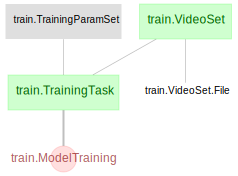

In [3]:
dj.Diagram(train) #- 1

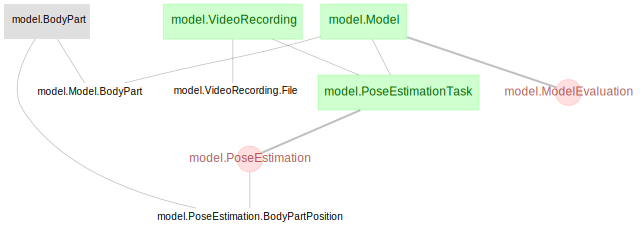

In [3]:
dj.Diagram(model)

### Table Types

- **Manual table**: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
- **Lookup table**: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
- **Imported table**: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
- **Computed table**: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for     
- **Part table**: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

### Table Links

- **One-to-one primary**: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
- **One-to-many primary**: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
- **Secondary dependency**: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

## Common Table Functions


- `<table>()` show table contents
- `heading` shows attribute definitions
- `describe()` show table defintiion with foreign key references

In [ ]:
model.VideoRecording.File()

subject,session_datetime,recording_id,file_id,"file_path filepath of video, relative to root data directory"


In [ ]:
model.Model.heading

# 
model_name           : varchar(64)                  # user-friendly model name
---
task                 : varchar(32)                  # task in the config yaml
date                 : varchar(16)                  # date in the config yaml
iteration            : int                          # iteration/version of this model
snapshotindex        : int                          # which snapshot for prediction (if -1, latest)
shuffle              : int                          # which shuffle of the training dataset
trainingsetindex     : int                          # which training set fraction to generate model
scorer               : varchar(64)                  # scorer/network name - DLC's GetScorerName()
config_template      : longblob                     # dictionary of the config for analyze_videos()
project_path         : varchar(255)                 # DLC's project_path in config relative to root
model_prefix=""      : varchar(32)                  # 
model_description="" : varc

In [ ]:
train.TrainingTask.describe()

# Specification for a DLC model training instance
-> train.VideoSet
-> train.TrainingParamSet
training_id          : int                          
---
model_prefix=""      : varchar(32)                  
project_path=""      : varchar(255)                 # DLC's project_path in config relative to root



'# Specification for a DLC model training instance\n-> train.VideoSet\n-> train.TrainingParamSet\ntraining_id          : int                          \n---\nmodel_prefix=""      : varchar(32)                  \nproject_path=""      : varchar(255)                 # DLC\'s project_path in config relative to root\n'

## Other Elements installed with the workflow

- [`lab`](https://github.com/datajoint/element-lab): lab management related information, such as Lab, User, Project, Protocol, Source.
- [`subject`](https://github.com/datajoint/element-animal): general animal information, User, Genetic background, Death etc.
- [`session`](https://github.com/datajoint/element-session): General information of experimental sessions.

For more information about these Elements, see [workflow session](https://github.com/datajoint/workflow-session).

In [ ]:
dj.Diagram(lab) + dj.Diagram(subject) + dj.Diagram(session)

In [11]:
session.Session.describe()

-> subject.Subject
session_datetime     : datetime                     



'-> subject.Subject\nsession_datetime     : datetime                     \n'

## Summary and next step

- This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

- The [next notebook](./03-Process.ipynb) will introduce the detailed steps to run through `workflow-deeplabcut`.